# Model

Three classification models are implemented and their performance is compared. The best model is then saved. 

## Import libraries

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

2023-05-30 13:37:03.954006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compare Random Forest, XGboost and SVM

In [3]:
df = pd.read_csv("data.csv")
train,test = train_test_split(df, test_size=0.2, shuffle=True)
X_train = train.drop(columns=["label"])
y_train = train.label
X_test = test.drop(columns=["label"])
y_test = test.label

### Random Forest

In [4]:
model = RandomForestClassifier(random_state=20)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
score = accuracy_score(y_predict, y_test)

print('{}% Acccuracy'.format(score * 100))

97.48563218390804% Acccuracy


### XGBoost 

In [5]:
model_xgb = XGBClassifier(random_state=20)
model_xgb.fit(X_train, y_train)
y_predict = model_xgb.predict(X_test)
score = accuracy_score(y_predict, y_test)

print('{}% Acccuracy'.format(score * 100))

96.47988505747126% Acccuracy


### Support Vector Machine

In [8]:
model_svm = svm.SVC(kernel='linear',random_state=20)
model_svm.fit(X_train, y_train)
y_predict = model_svm.predict(X_test)

print('{}% Accuracy'.format(score * 100))

96.62356321839081% Accuracy


The Random Forest has the highest accuracy and is therefore fine-tuned.

### The best model: Random Forest 

In [6]:
df = pd.read_csv("data.csv")
train,test = train_test_split(df, test_size=0.2, shuffle=True)
X_train = train.drop(columns=["label"])
y_train = train.label
X_test = test.drop(columns=["label"])
y_test = test.label

In [7]:
model = RandomForestClassifier(random_state=20)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [8]:
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_}")

Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy score: 0.975036495408434


In [9]:
best_params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}

In [11]:
model = RandomForestClassifier(**best_params,random_state=10)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
score = accuracy_score(y_test,y_predict)
print('{}% Acccuracy'.format(score * 100))

97.70114942528735% Acccuracy


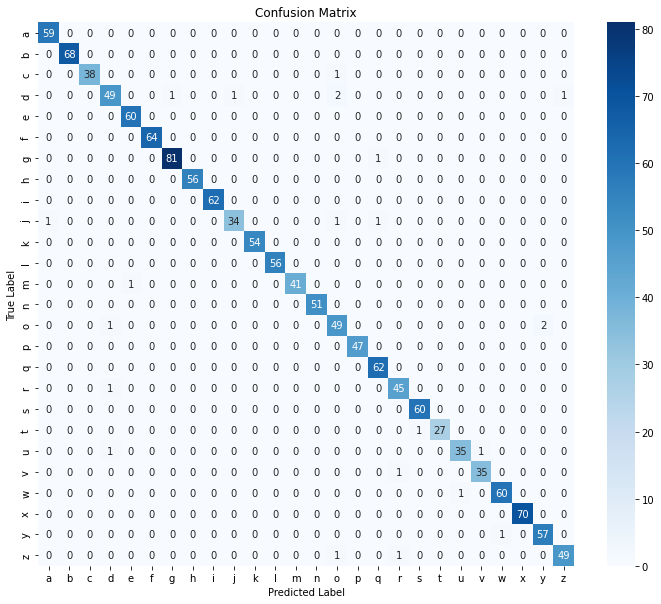

In [32]:
cm = confusion_matrix(y_test, y_predict)
cm_df = pd.DataFrame(cm, index=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], columns=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"])

plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [12]:
f1 = f1_score(y_test, y_predict, average='macro')
print('{}% F1 Score'.format(f1 * 100))

97.63968721085521% F1 Score


# Save the best model

In [20]:
f = open('model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()